In [ ]:
!sudo apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!unzip /content/analise-de-sentimento-politico-pelo-twitter-master.zip

Archive:  /content/analise-de-sentimento-politico-pelo-twitter-master.zip
74b14c0fa77c83b4e77576932895e99d12a4217c
replace analise-de-sentimento-politico-pelo-twitter-master/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Carregando dados
import glob

def df_all_folder(path,sufixo="_tweets.csv"):
    all_files = glob.glob(path + "*"+sufixo)
    li = []    
    
    for filename in all_files:
        df = pd.read_csv(filename, index_col=0)
        if "janones" not in filename: 
            li.append(df)
    names = []
    for filename in all_files:
        x = filename.replace(path, "")
        x = x.replace(sufixo, "")
        names.append(x.replace(" ","_"))
    return pd.concat(li, axis=0, keys =names).reset_index().rename(columns={'level_0': "candidato"})

In [ ]:
df = df_all_folder("/content/analise-de-sentimento-politico-pelo-twitter-master/analise-de-sentimento-politico-pelo-twitter/dados/ultimos_100_tweets/")
df = df[df['text'].notna()].reset_index(drop=True)
df

,candidato,level_1,text,id,retweets,replys,likes,author_id,source,lang,created_at,place_id
0,Luiz_Felipe_d’Avila,0,Luiz Felipe D’Ávila: “Eleitores estão preocupa...,1.537559e+18,2.0,2.0,13.0,1.445472e+18,Twitter Web App,pt,2022-06-16 22:15:23+00:00,NaN
1,Luiz_Felipe_d’Avila,1,@eitahlinda @P15Pablo Mas o candidato do Novo ...,1.537480e+18,0.0,0.0,0.0,1.314871e+08,Twitter for Android,pt,2022-06-16 16:57:46+00:00,NaN
2,Luiz_Felipe_d’Avila,2,@lfdavilaoficial @RomeuZema “Meu candidato a p...,1.537447e+18,0.0,1.0,0.0,1.935432e+09,Twitter Web App,pt,2022-06-16 14:47:02+00:00,NaN
3,Luiz_Felipe_d’Avila,3,“Meu candidato a presidente é Luiz Felipe D´Av...,1.537435e+18,49.0,58.0,510.0,9.008318e+17,Twitter Web App,pt,2022-06-16 14:00:02+00:00,NaN
4,Luiz_Felipe_d’Avila,4,@joaoamoedonovo O Luiz Felipe D’Ávila é um exc...,1.537127e+18,0.0,0.0,0.0,1.518767e+18,Twitter for iPhone,pt,2022-06-15 17:38:06+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1733,bivar,95,@Anitta ANITTA VC PRECISA VER SOBRE A VERA LÚC...,1.546963e+18,0.0,0.0,0.0,1.460646e+18,Twitter for Android,pt,2022-07-12 21:02:57+00:00,NaN
1734,bivar,96,Olá 👋 passando aqui para informar que a partir...,1.546962e+18,0.0,0.0,4.0,4.195617e+08,Twitter Web App,pt,2022-07-12 20:57:43+00:00,NaN
1735,bivar,97,O dinheiro que a mona investiu pra superar a V...,1.546958e+18,0.0,1.0,1.0,1.158390e+18,Twitter for iPhone,pt,2022-07-12 20:40:36+00:00,NaN
1736,bivar,98,"Daqui a pouco, as 18h, a rádio web 2 de Julho ...",1.546957e+18,0.0,0.0,0.0,1.506264e+18,Twitter Web App,pt,2022-07-12 20:35:52+00:00,NaN


In [ ]:
y = df_all_folder("/content/analise-de-sentimento-politico-pelo-twitter-master/analise-de-sentimento-politico-pelo-twitter/dados/ultimos_100_tweets/",sufixo='_labeled.csv')['level_1'].dropna().apply(lambda x : x.upper()).reset_index(drop=True)

In [ ]:
y = y.apply(lambda x: 0 if x == 'NG' else 1 if x == 'NT' else 2)

In [ ]:
y.shape

(1738,)

In [ ]:
df['sentimento'] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('portuguese'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

df['text'] = df.apply(lambda row: remove_stop_words(row['text']), axis = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df

,candidato,text,sentimento
0,Luiz_Felipe_d’Avila,luiz felipe d ávila eleitores preocupados paga...,0
1,Luiz_Felipe_d’Avila,eitahlinda candidato novo luiz felipe,0
2,Luiz_Felipe_d’Avila,lfdavilaoficial romeuzema candidato presidente...,1
3,Luiz_Felipe_d’Avila,candidato presidente luiz felipe frase romeuze...,0
4,Luiz_Felipe_d’Avila,joaoamoedonovo luiz felipe d ávila excelente c...,0
...,...,...,...
1733,bivar,anitta anitta vc precisa ver sobre vera lúcia ...,1
1734,bivar,olá passando aqui informar partir semana pré p...,1
1735,bivar,dinheiro mona investiu pra superar vera lúcia ...,2
1736,bivar,daqui pouco rádio web julho reapresenta entrev...,1


In [ ]:
cols = ['candidato', 'text', 'sentimento']
df = df[cols]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentimento'], test_size=0.33, random_state=42)

In [ ]:
train = pd.DataFrame(data = {"texto": X_train, "sentimento": y_train})

In [ ]:
train

,texto,sentimento
147,thiagoresiste lulaoficial fatimabezerra ricard...,0
360,nova pesquisa vários institutos diz eymael gan...,0
83,milícia digital pt lula pode perder fundão ter...,2
48,faveladoinvest xará luiz felipe d ávila,0
468,anitta fala queria novidade política tebet pab...,1
...,...,...
1130,cuántas balas dispararon ciro abrazos balazos ...,0
1294,bellaldm nesse sentido pré candidata presidênc...,2
860,rafinhabastos rafa vem simone tebet vamos juntos,1
1459,kimpaim bolsonaro x artistas lei rouanet bolso...,0


In [ ]:
test = pd.DataFrame(data = {"texto": X_test, "sentimento": y_test})
test

,texto,sentimento
482,viniciusduarte somar intenções voto ciro janon...,1
1506,agora bivar decola bate,1
950,vote ciro gomes livra lula amp bolsonaro https,1
1005,siempre dijo el expresidente borolas desde el ...,1
705,jairbolsonaro contra ódio contra bolsonaro qua...,0
...,...,...
560,guardian just reminder when bolsonaro proposed...,1
937,roxmo cevileriocelso simone tebet antidoto con...,2
1481,bivar sério https,1
1040,puedo ver ciro dios siento q hablo conmigo mismo,2


# TFIDF e BOW

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.rslp import RSLPStemmer
from nltk.corpus import stopwords
from string import punctuation

def lema(word):
    lemmatizer = RSLPStemmer()    
    return "%s" % lemmatizer.stem(word)

df['palavras'] = df.apply(lambda row: word_tokenize(row['text'].lower()), axis=1)
df['palavras'] = df.apply(lambda row: word_tokenize(row['text'].lower()), axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   candidato   1738 non-null   object
 1   text        1738 non-null   object
 2   sentimento  1738 non-null   int64 
 3   palavras    1738 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.4+ KB


In [ ]:
pal = []

for palavras in df['palavras']:
    pal += palavras
pal

['luiz',
 'felipe',
 'd',
 'ávila',
 'eleitores',
 'preocupados',
 'pagar',
 'contas',
 'https',
 'eitahlinda',
 'candidato',
 'novo',
 'luiz',
 'felipe',
 'lfdavilaoficial',
 'romeuzema',
 'candidato',
 'presidente',
 'luiz',
 'felipe',
 'obrigação',
 'partidária',
 'zema',
 'posicionou',
 'favor',
 'bolsonaro',
 'ridículo',
 'politicamente',
 'zero',
 'esquerda',
 'posicionar',
 'assim',
 'mostra',
 'preparo',
 'nenhum',
 'candidato',
 'presidente',
 'luiz',
 'felipe',
 'frase',
 'romeuzema',
 'mostra',
 'novo',
 'unidade',
 'foco',
 'brasil',
 'dá',
 'certo',
 'minas',
 'gerais',
 'livrou',
 'gestão',
 'pt',
 'arruinou',
 'estado',
 'constante',
 'crescimento',
 'modelo',
 'podemos',
 'levar',
 'todo',
 'brasil',
 'https',
 'joaoamoedonovo',
 'luiz',
 'felipe',
 'd',
 'ávila',
 'excelente',
 'candidato',
 'presidência',
 'pena',
 'partido',
 'última',
 'pesquisa',
 'eleitoral',
 'lula',
 'silva',
 'bozo',
 'ciro',
 'gomes',
 'simone',
 'tebet',
 'luiz',
 'felipe',
 'luciano',
 'biva

In [ ]:
pd.set_option('display.max_rows', 100)
texto = pd.Series(pal)
texto.value_counts()

https          629
lula           415
bolsonaro      358
tebet          294
ciro           271
              ... 
finalizar        1
homossexual      1
galãs            1
feios            1
somam            1
Length: 6587, dtype: int64

In [ ]:
while "https" in pal:
    pal.remove("https")

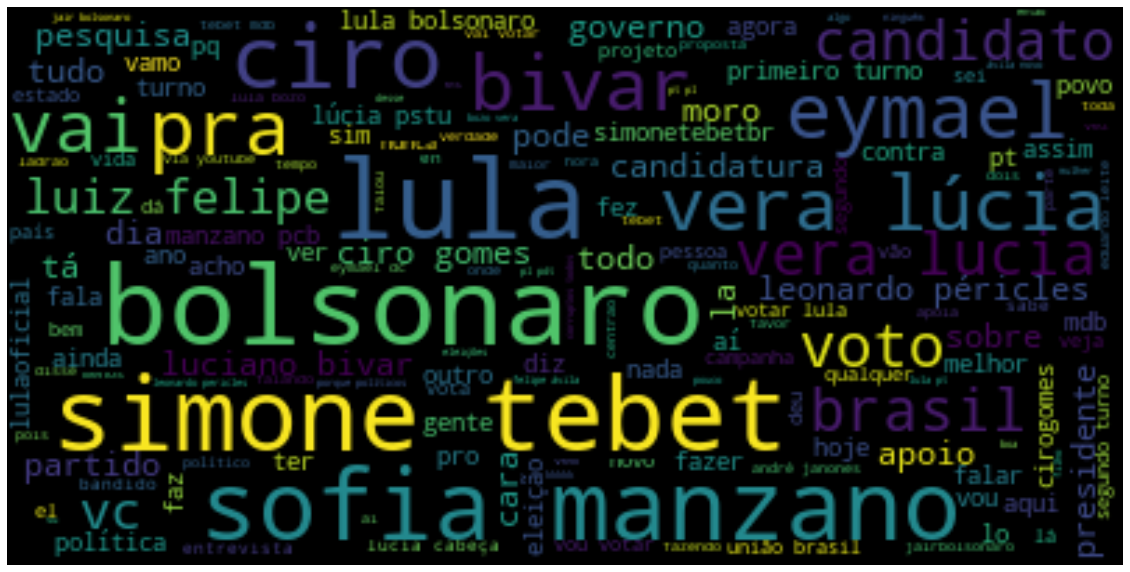

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=40).generate(' '.join(pal))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df['lemma'] = df.apply(lambda row: [lema(w) for w in row['palavras']], axis=1)
df['lemma'] = df.apply(lambda row: [lema(w) for w in row['palavras']], axis=1)

In [ ]:
from gensim import corpora

bow = corpora.Dictionary(df['lemma'])

In [ ]:
import gensim
vocab_len = len(bow)
arr = []
for line in train['lemma']:
    for word in line:
        arr.append(bow.token2id[word])
    break

In [ ]:
print(sorted(arr))

[62, 519, 520, 521, 522, 546]


In [ ]:
import gensim
from gensim.models import TfidfModel

vocab_len = len(bow.token2id)
test_features_tfidf = []
corpus = [bow.doc2bow(line) for line in train['lemma']]
tfidf_model = TfidfModel(corpus)

### BOW
test_features_bow = []
for index, row in X_test.iterrows():
    # Converting the tokens into the formet that the model requires
    features = gensim.matutils.corpus2csc([bow.doc2bow(row['lemma'])],num_terms=vocab_len).toarray()[:,0]
    test_features_bow.append(features)

bow_filename = '/content/train_bow.csv'
# Storing the tfidf vectors for training data in a file
with open(bow_filename, 'w+') as bow_file:
    for index, row in X_train.iterrows():
        doc = bow.doc2bow(row['lemma'])
        features = gensim.matutils.corpus2csc([doc], num_terms=vocab_len).toarray()[:,0]
        if index == 0:
            header = ",".join(str(bow[ele]) for ele in range(vocab_len))
            bow_file.write(header)
            bow_file.write("\n")
        line1 = ",".join( [str(vector_element) for vector_element in features] )
        bow_file.write(line1)
        bow_file.write('\n')

#### TFIDF
for index, row in X_test.iterrows():
    doc = bow.doc2bow(row['lemma'])
    features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
    test_features_tfidf.append(features)

tfidf_filename = '/content/train_tfidf.csv'
# Storing the tfidf vectors for training data in a file
with open(tfidf_filename, 'w+') as tfidf_file:
    for index, row in X_train.iterrows():
        doc = bow.doc2bow(row['lemma'])
        features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
        if index == 0:
            header = ",".join(str(bow[ele]) for ele in range(vocab_len))
            print(header)
            print(tfidf_model[doc])
            tfidf_file.write(header)
            tfidf_file.write("\n")
        line1 = ",".join( [str(vector_element) for vector_element in features] )
        tfidf_file.write(line1)
        tfidf_file.write('\n')

cont,d,elei,felip,http,luiz,pag,preocup,ávil,candidat,eitahlind,nov,assim,bolsonar,esquerd,favor,lfdavilaofic,mostr,nenhum,obrig,partidár,politic,posic,posicion,prepar,presid,ridícul,romeuzem,zem,zer,arruin,brasil,cert,const,cresc,dá,est,foc,fras,geral,gest,lev,livr,min,model,pod,pt,tod,unidad,excel,joaoamoedonov,part,pen,biv,boz,cir,civil,eleitor,enraiz,gom,infeliz,luci,lul,pesquis,polar,profund,silv,simon,sociedad,tebet,últ,andré,burgues,futur,janon,psd,sim,braun,cuj,deput,estad,fez,freder,genealog,hoj,irm,juda,matern,matér,orig,pai,sobr,claudioedant,corj,dev,fat,lauramariott,mor,ouv,país,projet,propost,separ,ub,únic,aind,av,bem,estimul,heldersaloma,ináci,jair,mdb,pdt,pl,precis,prim,seg,turn,vot,vou,acompanh,dest,entrevist,feir,perspec,planalt,program,camp,cobert,compon,ericksantossp,exempl,exist,express,ideológ,mesm,moviment,outr,pq,tend,trag,tá,anul,argument,avil,birr,gost,pra,razoá,ach,atual,melhor,boa,opç,afirm,apoi,bh,dia,entusiasm,govern,públic,receb,rom,sulaim,valdocruz,ent,gu

In [ ]:
from gensim.models import TfidfModel
import gensim

submission_tfidf = []

for index, row in test.iterrows():
    doc = bow.doc2bow(row['lemma'])
    features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
    submission_tfidf.append(features)

### BOW
submission_bow = []
for index, row in test.iterrows():
    # Converting the tokens into the formet that the model requires
    features = gensim.matutils.corpus2csc([bow.doc2bow(row['lemma'])],num_terms=vocab_len).toarray()[:,0]
    submission_bow.append(features)

bow_filename = '/content/submission_bow.csv'
# Storing the tfidf vectors for training data in a file
with open(bow_filename, 'w+') as bow_file:
    for index, row in test.iterrows():
        doc = bow.doc2bow(row['lemma'])
        features = gensim.matutils.corpus2csc([doc], num_terms=vocab_len).toarray()[:,0]
        if index == 0:
            header = ",".join(str(bow[ele]) for ele in range(vocab_len))
            bow_file.write(header)
            bow_file.write("\n")
        line1 = ",".join( [str(vector_element) for vector_element in features] )
        bow_file.write(line1)
        bow_file.write('\n')

#### TFIDF
tfidf_filename = '/content/submission_tfidf.csv'
# Storing the tfidf vectors for training data in a file
with open(tfidf_filename, 'w+') as tfidf_file:
    for index, row in test.iterrows():
        doc = bow.doc2bow(row['lemma'])
        features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
        if index == 0:
            header = ",".join(str(bow[ele]) for ele in range(vocab_len))
            tfidf_file.write(header)
            tfidf_file.write("\n")
        line1 = ",".join( [str(vector_element) for vector_element in features] )
        tfidf_file.write(line1)
        tfidf_file.write('\n')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

# Read the TFIDF vectors
tfidf_df = pd.read_csv('/content/train_tfidf.csv')
bow_df = pd.read_csv('/content/train_bow.csv')

# # Initialize the model
clf_decision_tfidf = DecisionTreeClassifier(random_state=2, max_depth=10)

# # Fit the model 
clf_decision_tfidf.fit(bow_df, Y_train['sentimento'])

DecisionTreeClassifier(max_depth=10, random_state=2)

In [ ]:
from sklearn.metrics import classification_report
test_predictions_tfidf = clf_decision_tfidf.predict(test_features_bow)
print(classification_report(Y_test['sentimento'],test_predictions_tfidf))


              precision    recall  f1-score   support

           0       0.26      0.14      0.18        84
           1       0.57      0.82      0.67       193
           2       0.09      0.03      0.04        71

    accuracy                           0.50       348
   macro avg       0.31      0.33      0.30       348
weighted avg       0.40      0.50      0.43       348



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(bow_df.values, Y_train['sentimento'].values)

XGBClassifier(objective='multi:softprob')

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

test_predictions_tfidf = model.predict(np.matrix(test_features_bow))
probabilities_tfidf = model.predict_proba(np.matrix(test_features_bow))
print(classification_report(Y_test['sentimento'],test_predictions_tfidf))
loss = log_loss(Y_test['sentimento'], probabilities_tfidf)
print(loss)

              precision    recall  f1-score   support

           0       0.27      0.10      0.14        84
           1       0.57      0.91      0.70       193
           2       0.50      0.07      0.12        71

    accuracy                           0.54       348
   macro avg       0.45      0.36      0.32       348
weighted avg       0.48      0.54      0.45       348

0.960297776450371


In [ ]:
import xgboost as xgb
params = {
    # Parameters that we are going to tune.
    'max_depth':100,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'n_estimators': 1000
}

hyp = xgb.XGBClassifier(params=params)
evaluation = [(tfidf_df.values, Y_train['sentimento'].values)]
hyp.fit(tfidf_df.values, Y_train['sentimento'].values,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=1000,verbose=False)

XGBClassifier(objective='multi:softprob',
              params={'colsample_bytree': 1, 'eta': 0.3, 'max_depth': 100,
                      'min_child_weight': 1, 'n_estimators': 1000,
                      'subsample': 1})

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

test_predictions_tfidf = hyp.predict(np.matrix(test_features_bow))
probabilities_tfidf = hyp.predict_proba(np.matrix(test_features_bow))

print(classification_report(Y_test['sentimento'],test_predictions_tfidf))
loss = log_loss(Y_test['sentimento'], probabilities_tfidf)
print(loss)

              precision    recall  f1-score   support

           0       0.31      0.06      0.10        84
           1       0.57      0.87      0.69       193
           2       0.22      0.11      0.15        71

    accuracy                           0.52       348
   macro avg       0.37      0.35      0.31       348
weighted avg       0.44      0.52      0.44       348

1.0103159674239912


# Using BERT

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
df = df_all_folder("/content/analise-de-sentimento-politico-pelo-twitter-master/analise-de-sentimento-politico-pelo-twitter/dados/ultimos_100_tweets/")
df = df[df['text'].notna()].reset_index(drop=True)
y = df_all_folder("/content/analise-de-sentimento-politico-pelo-twitter-master/analise-de-sentimento-politico-pelo-twitter/dados/ultimos_100_tweets/",sufixo='_labeled.csv')['level_1'].dropna().apply(lambda x : x.upper()).reset_index(drop=True)
y = y.apply(lambda x: 0 if x == 'NG' else 1 if x == 'NT' else 2)
df['sentimento'] = y
df = df[cols]

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3)

train_df = train_df[['text', 'sentimento']]

In [ ]:
test_df = test_df[['text', 'sentimento']]


In [ ]:
from transformers import AutoTokenizer, TFPreTrainedModel, AutoModel
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "neuralmind/bert-large-portuguese-cased",
    num_labels=3,
    args=train_args,
    use_cuda=True
)
  
tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-large-portuguese-cased")
#model = AutoModel.from_pretrained("neuralmind/bert-base-portuguese-cased")

Some weights of the model checkpoint at neuralmind/bert-large-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from th

In [ ]:
train_df

,text,sentimento
1094,"@Ciro_de_trator A beleza, pq eu realmente nao ...",1
1736,"Daqui a pouco, as 18h, a rádio web 2 de Julho ...",1
1104,@lauramariotto @EletricPhuneral Ciro não tem n...,0
1001,@CAlvesRJ @DriicaaMR @ciro_nogueira Vc conhece...,1
1329,@SofiaManzanoPCB Viva nossa candidata PCB à pr...,0
...,...,...
94,"@driufc @HMarahu Não, a foto correta do Lula e...",0
887,O presidente do @23cidadania do Espírito Santo...,2
1334,"Meu Deus, como tem profissionais incompetentes...",0
781,@andre_assaf @Kennedy14053908 @politica_estilo...,0


In [ ]:
!rm -rf outputs

In [ ]:
model.train_model(train_df, overwrite_output_dir= True)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:602: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1216 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/152 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/152 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/152 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/152 [00:00<?, ?it/s]

(608, 0.8782509740589088)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/522 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/66 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.13691602783899004,
 'f1': 0.5095785440613027,
 'acc': 0.5095785440613027,
 'eval_loss': 1.2251526925599936}

In [ ]:
wrong_predictions

[{'guid': 0, 'text_a': '@ciro_nogueira Vagabundo vc é um safado', 'text_b': None, 'label': 0},
 {'guid': 2, 'text_a': 'Nem Lula, nem Bolsonaro. Os dois são iguais. \n\nVou de Simone Tebet. \n\nNÃO PÉRA, 😱!!!!!!\n\nEsse é o Teatro das Tesouras pra enganar você. https://t.co/cpiw6d7mMO', 'text_b': None, 'label': 0},
 {'guid': 3, 'text_a': '@GadoDecider Fiquem em casa a economia a gente vê depois... O depois chegou, agora chorem e elegem o Lula pra piorar o que resta.', 'text_b': None, 'label': 0},
 {'guid': 4, 'text_a': '@EletricPhuneral @lauramariotto Ciro gomes foi ministro da fazenda e teve o maior superávit da história, ajudou a salvar o plano real, como governador é reconhecido pela responsabilidade fiscal.', 'text_b': None, 'label': 1},
 {'guid': 5, 'text_a': '@o_antagonista @EduardoLeite_ E o Bivar, cresceu muito nas pesquisa eleitorais, ele tinha 0 % agora tem 0,25%. Já, já vai disputar o 2º turno com o Lula! https://t.co/P8snHJEmfC', 'text_b': None, 'label': 2},
 {'guid': 9, 'te